In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

In [5]:
user_df = pd.read_csv("/Users/tharanidissanayake/Downloads/yelp_academic_dataset_user_preprocessed.csv")

In [6]:
user_df.head()

,num,user_id,name,review_count,useful,funny,cool,fans,average_stars,compliment_hot,...,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,elite_years,is_elite,years_on_platform
0,0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,7217,1259,5994,267,3.91,250,...,18,232,844,467,467,239,180,1,1,16
1,1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,43091,13066,27281,3138,3.74,1145,...,251,1847,7054,3131,3131,1521,1946,14,1,14
2,2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2086,1010,1003,52,3.32,89,...,3,66,96,119,119,35,18,5,1,15
3,3,SZDeASXq7o05mMNLshsdIA,Gwen,224,512,330,299,28,4.27,24,...,2,12,16,26,26,10,9,3,1,18
4,4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,29,15,7,1,3.54,1,...,0,1,1,0,0,0,0,0,0,16


In [7]:
#drop the unnecessary columns
user_df.drop(['user_id', 'num', 'name','compliment_hot','compliment_more','compliment_profile','compliment_cute','compliment_list','compliment_note','compliment_plain','compliment_cool','compliment_funny','compliment_writer','compliment_photos'], axis=1, inplace=True)

In [8]:
scaler = StandardScaler()
user_df_scaled = scaler.fit_transform(user_df)

In [6]:
user_df_scaled.shape

(1987897, 9)

In [9]:
user_df_scaled 

array([[ 6.80181900e+00,  1.11846025e+01,  3.04565794e+00, ...,
         7.66599339e-01,  4.56043794e+00,  2.36110210e+00],
       [ 5.21952731e+01,  6.71083657e+01,  3.19983393e+01, ...,
         1.30914435e+01,  4.56043794e+00,  1.71841367e+00],
       [ 7.77072943e+00,  3.18591737e+00,  2.43506950e+00, ...,
         4.55885908e+00,  4.56043794e+00,  2.03975788e+00],
       ...,
       [-2.34893070e-01, -6.43766092e-02, -3.91623482e-02, ...,
        -1.81465597e-01, -2.19277186e-01, -8.52340012e-01],
       [-2.59115831e-01, -6.59355032e-02, -4.16145106e-02, ...,
        -1.81465597e-01, -2.19277186e-01,  1.07572525e+00],
       [-2.59115831e-01, -6.59355032e-02, -4.16145106e-02, ...,
        -1.81465597e-01, -2.19277186e-01, -2.13771685e+00]])

/Users/tharanidissanayake/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tharanidissanayake/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tharanidissanayake/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tharanidissanayake/PycharmProj

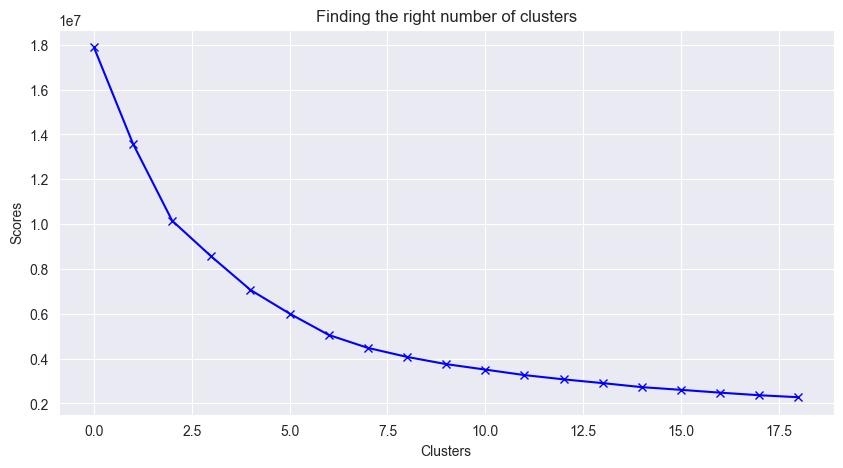

In [11]:
scores_1 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(user_df_scaled)
  scores_1.append(kmeans.inertia_) 
plt.figure(figsize = (10,5))
plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

In [12]:
kmeans = KMeans(8)
kmeans.fit(user_df_scaled)
labels = kmeans.labels_

/Users/tharanidissanayake/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [13]:
kmeans.cluster_centers_.shape

(8, 9)

In [14]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [user_df.columns])
cluster_centers  

,review_count,useful,funny,cool,fans,average_stars,elite_years,is_elite,years_on_platform
0,-0.226275,-0.059162,-0.039023,-0.041227,-0.077038,-1.481966,-0.181466,-0.219277,-0.620571
1,-0.180141,-0.059142,-0.039384,-0.039505,-0.071391,0.687524,-0.181466,-0.219277,-0.689065
2,1.417942,0.275862,0.135904,0.154649,0.477469,0.309278,2.920772,4.560438,0.570480
3,65.242690,225.169527,239.305374,237.927082,69.887115,0.252499,8.689713,4.560438,1.374116
4,23.215279,57.101616,53.388196,56.906687,49.269468,0.283225,8.840443,4.483346,1.281316
5,6.334742,2.243762,1.525648,1.615409,3.054318,0.204643,7.508990,4.484095,1.266423
6,-0.003275,-0.027794,-0.025180,-0.029667,-0.037903,0.208993,-0.181466,-0.219277,0.882809
7,15.207029,15.983519,13.859872,14.772421,16.306935,0.239284,8.446002,4.444706,1.312778


In [15]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [user_df.columns])
cluster_centers

,review_count,useful,funny,cool,fans,average_stars,elite_years,is_elite,years_on_platform
0,4.711549,4.344753,1.056946,0.485272,0.068986,1.876830,-2.038925e-13,-4.207051e-14,6.721250
1,8.520695,4.357661,0.909504,1.458821,0.171366,4.444066,-4.349576e-13,4.815592e-15,6.508101
2,140.469589,219.256686,72.392542,111.224089,10.122617,3.996474,3.272178e+00,1.000000e+00,10.427712
3,5410.285714,144484.142857,97606.500000,134536.142857,1268.571429,3.929286,9.357143e+00,1.000000e+00,12.928571
4,1940.209677,36671.865591,21788.854839,32196.053763,894.758065,3.965645,9.516129e+00,9.838710e-01,12.639785
5,546.434846,1481.625915,639.134700,937.066285,56.842806,3.872656,8.111740e+00,9.840277e-01,12.593438
6,23.123981,24.466745,6.701857,7.020369,0.778522,3.877804,-4.939660e-13,3.256423e-14,11.399659
7,1278.992736,10295.410815,5669.072639,8375.397902,297.122680,3.913648,9.100081e+00,9.757869e-01,12.737692


In [16]:
labels.shape

(1987897,)

In [17]:
labels.max()

7

In [18]:
labels.min()

0

In [19]:
y_kmeans = kmeans.fit_predict(user_df_scaled)
y_kmeans

/Users/tharanidissanayake/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([6, 2, 3, ..., 5, 0, 1], dtype=int32)

In [20]:
user_df_cluster = pd.concat([user_df, pd.DataFrame({'cluster':labels})], axis=1)
user_df_cluster.head()

,review_count,useful,funny,cool,fans,average_stars,elite_years,is_elite,years_on_platform,cluster
0,585,7217,1259,5994,267,3.91,1,1,16,7
1,4333,43091,13066,27281,3138,3.74,14,1,14,4
2,665,2086,1010,1003,52,3.32,5,1,15,5
3,224,512,330,299,28,4.27,3,1,18,2
4,79,29,15,7,1,3.54,0,0,16,6


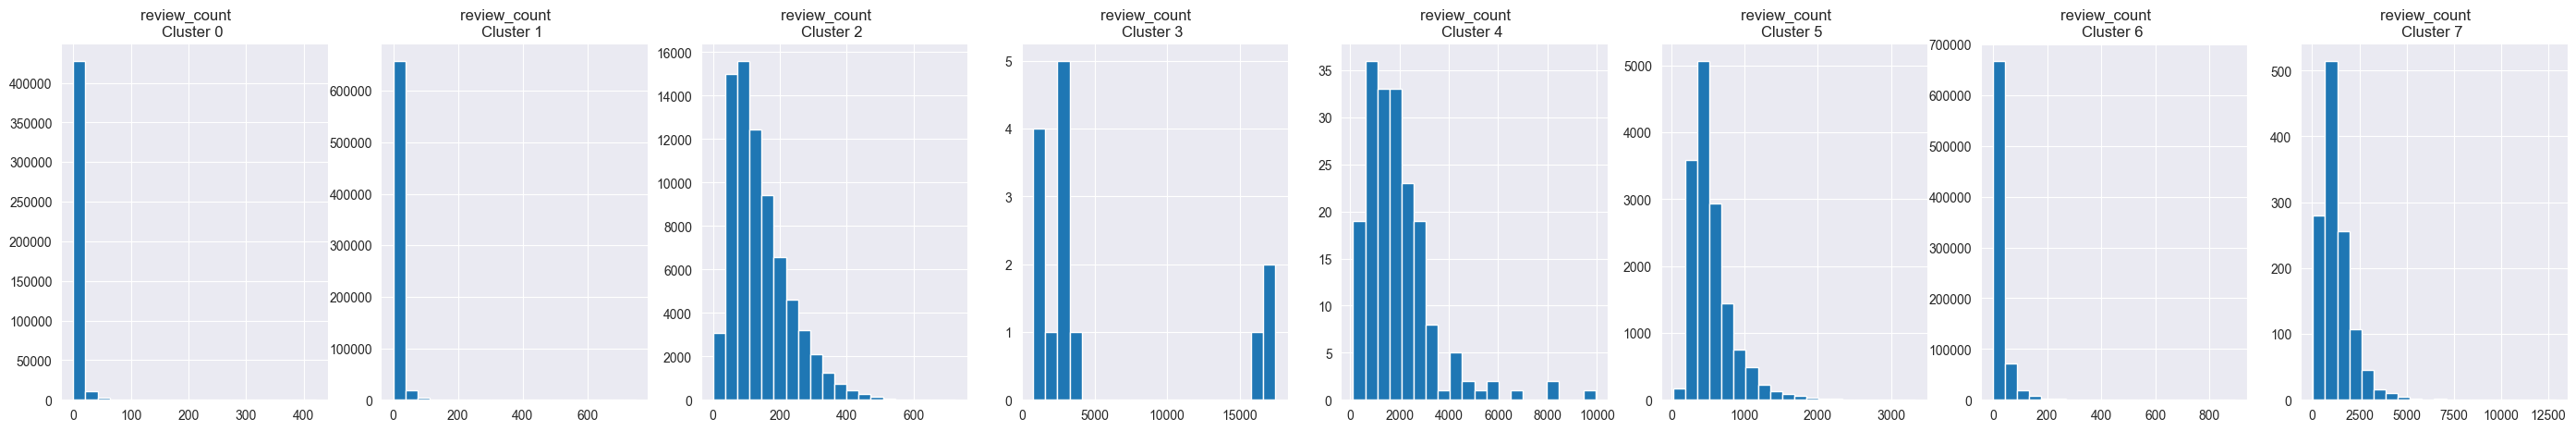

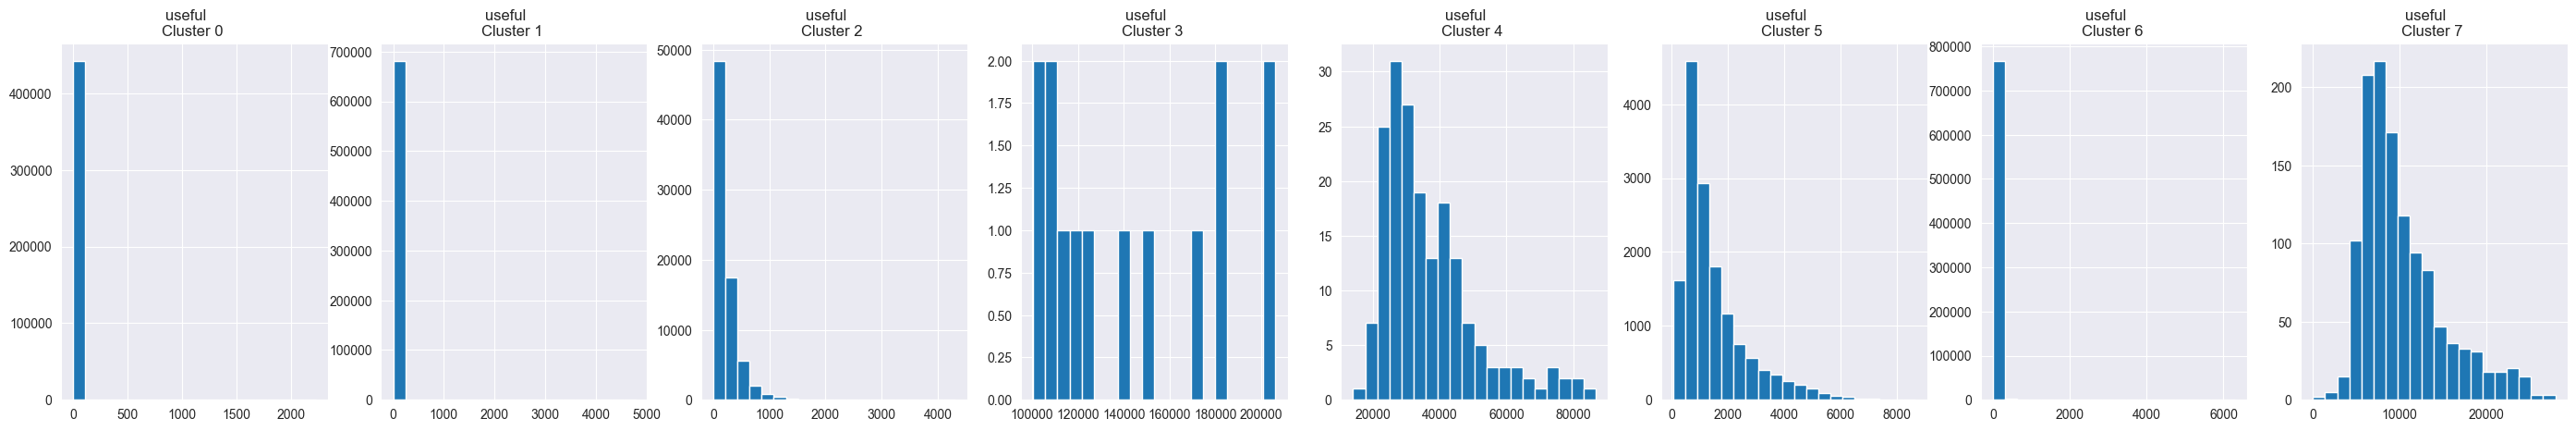

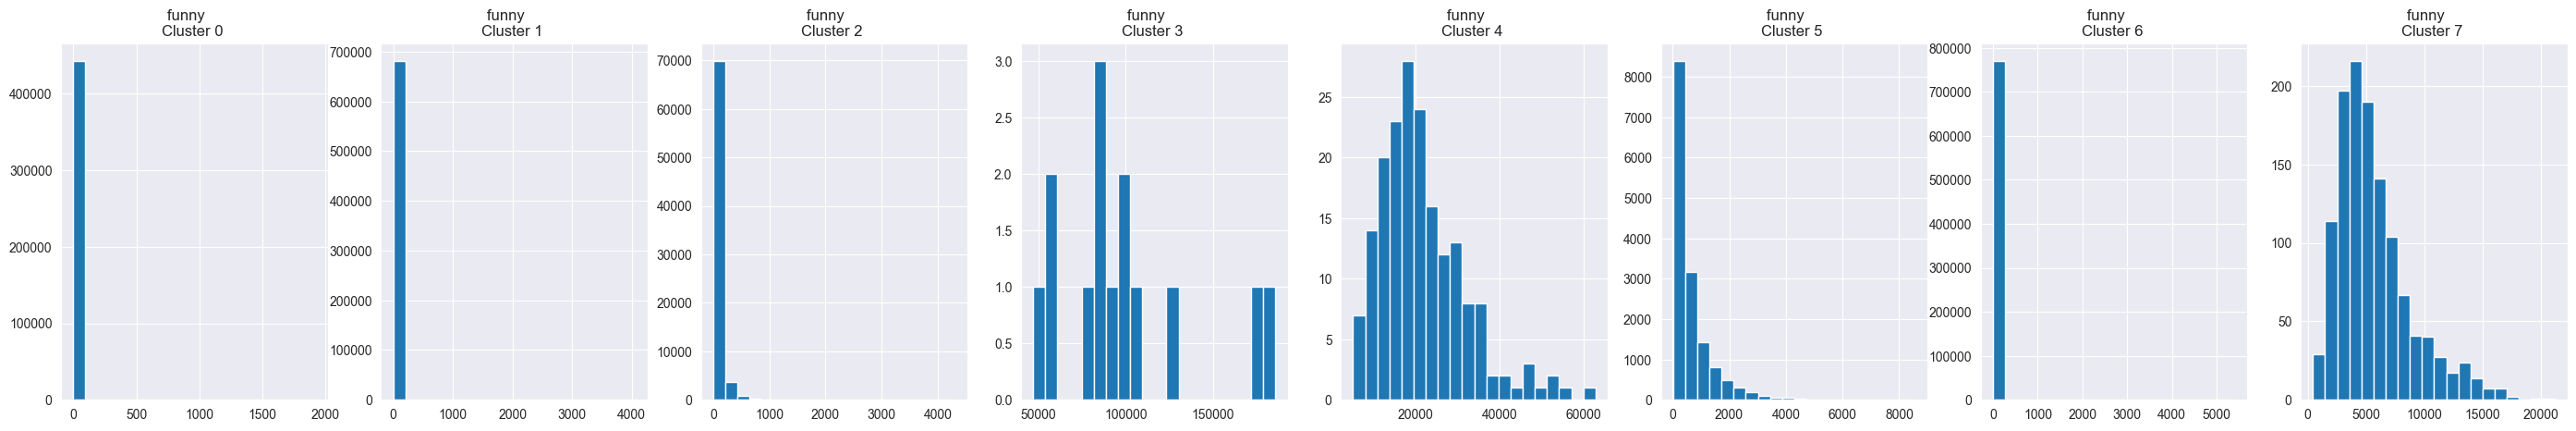

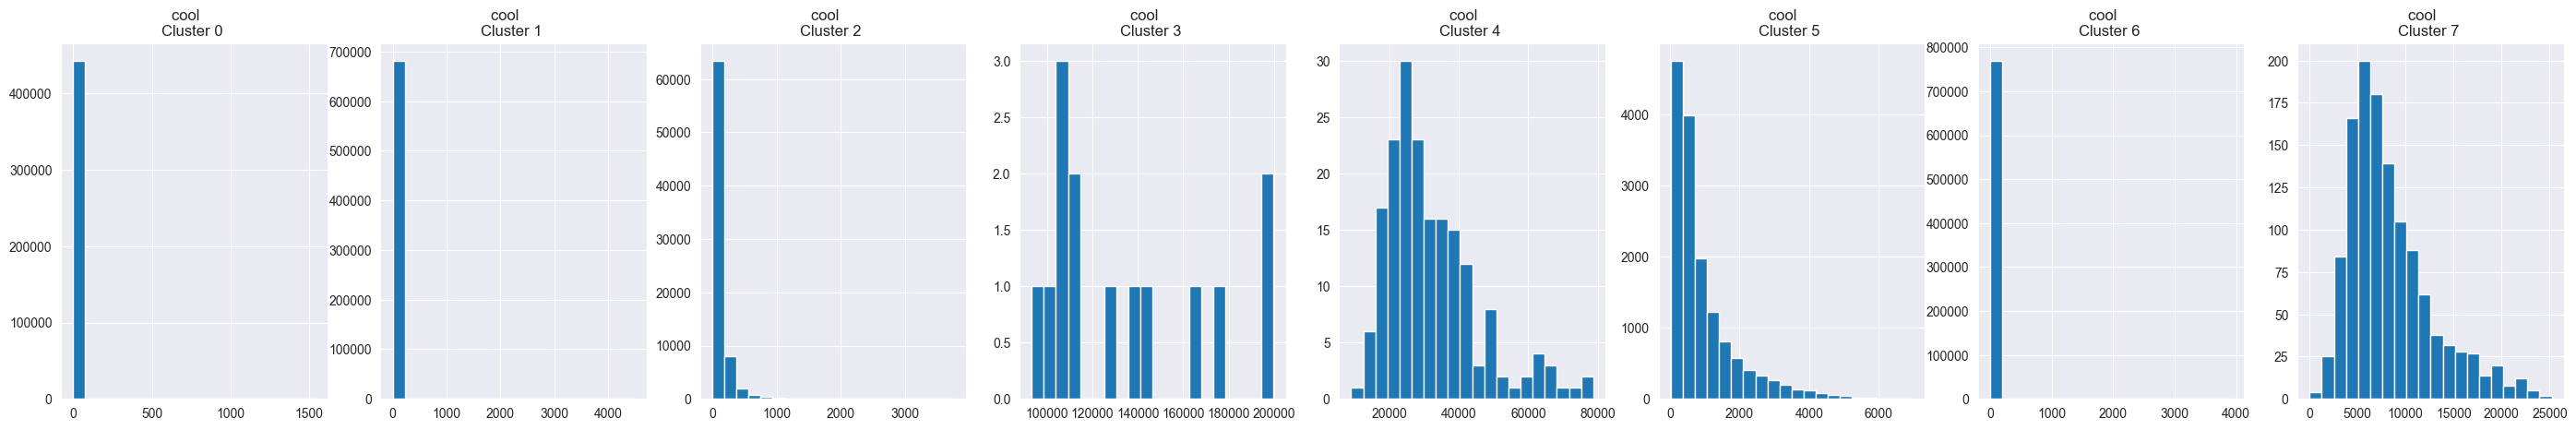

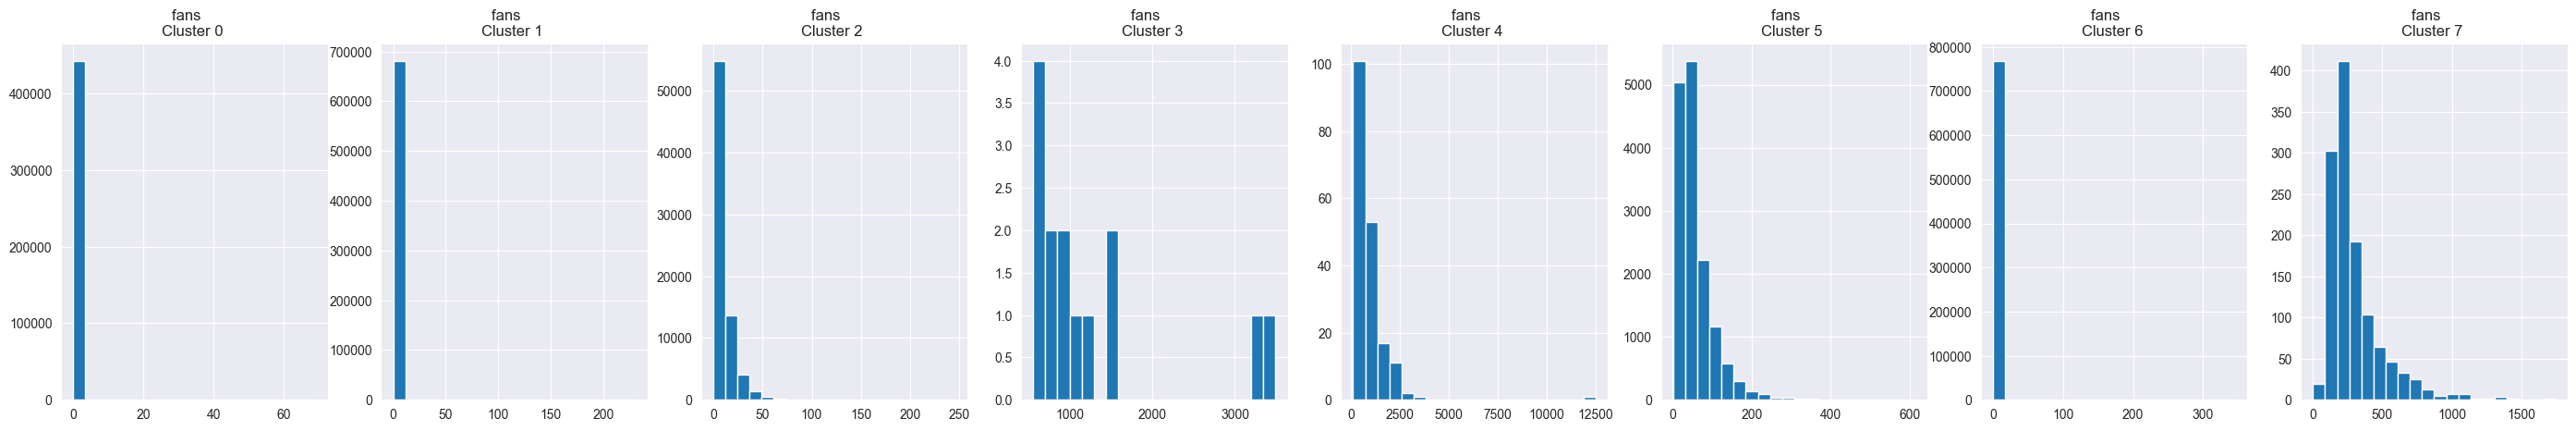

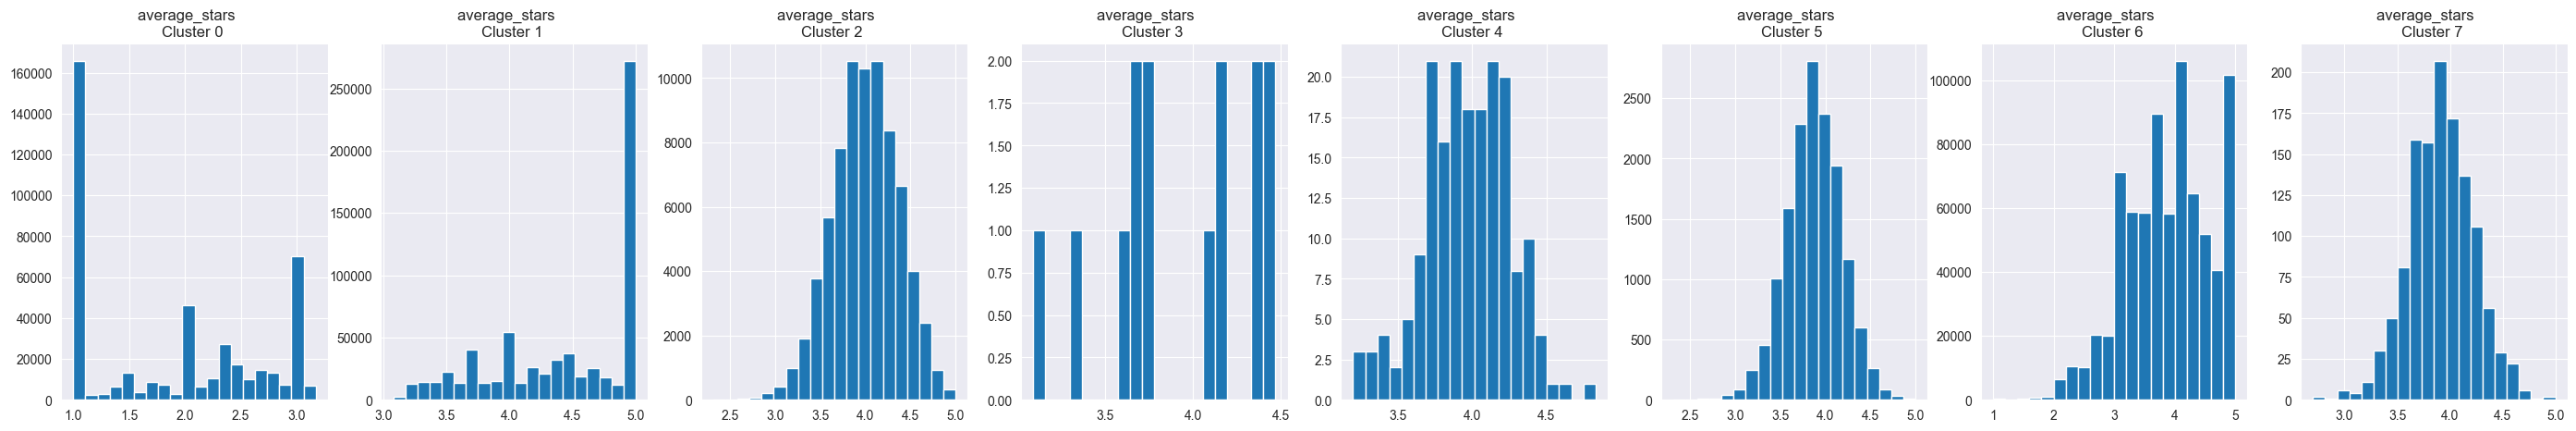

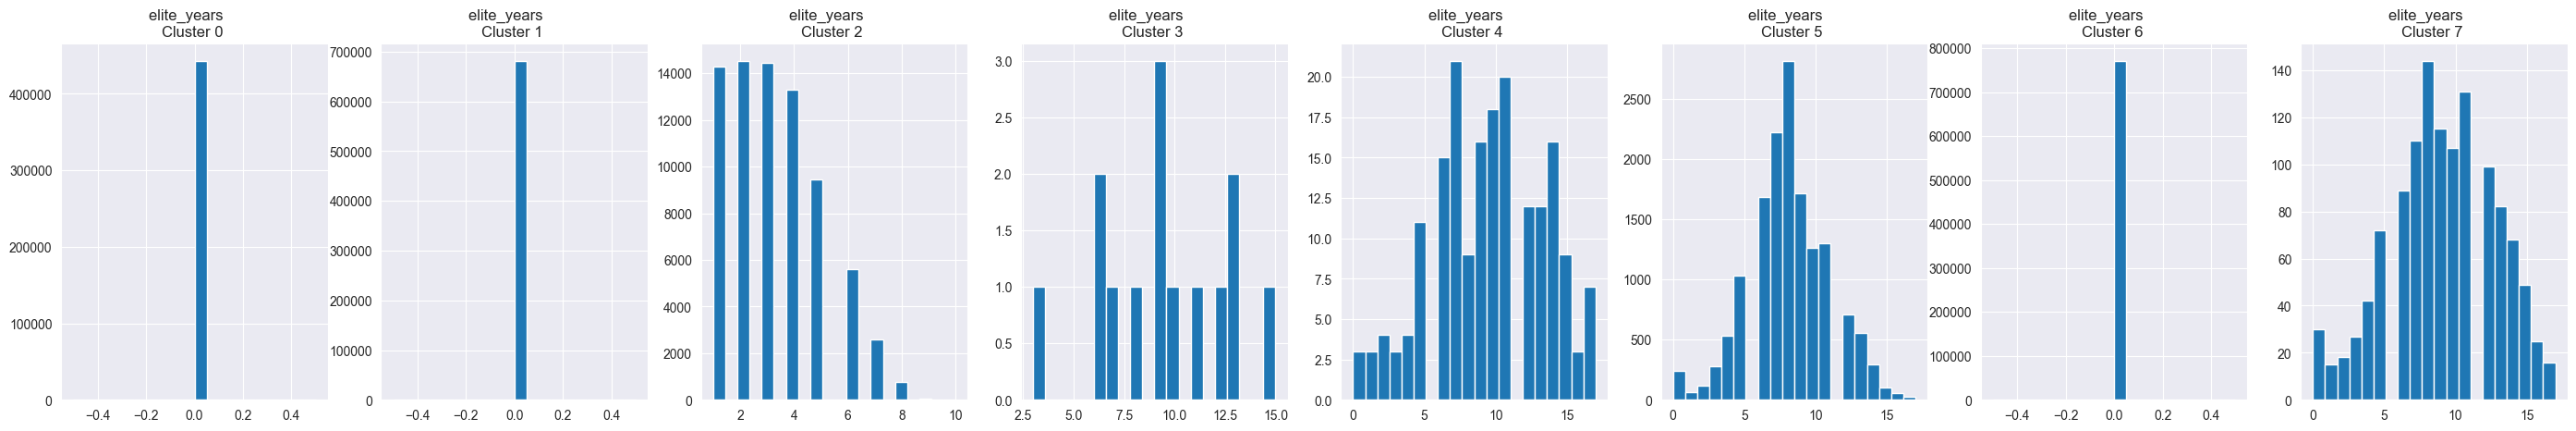

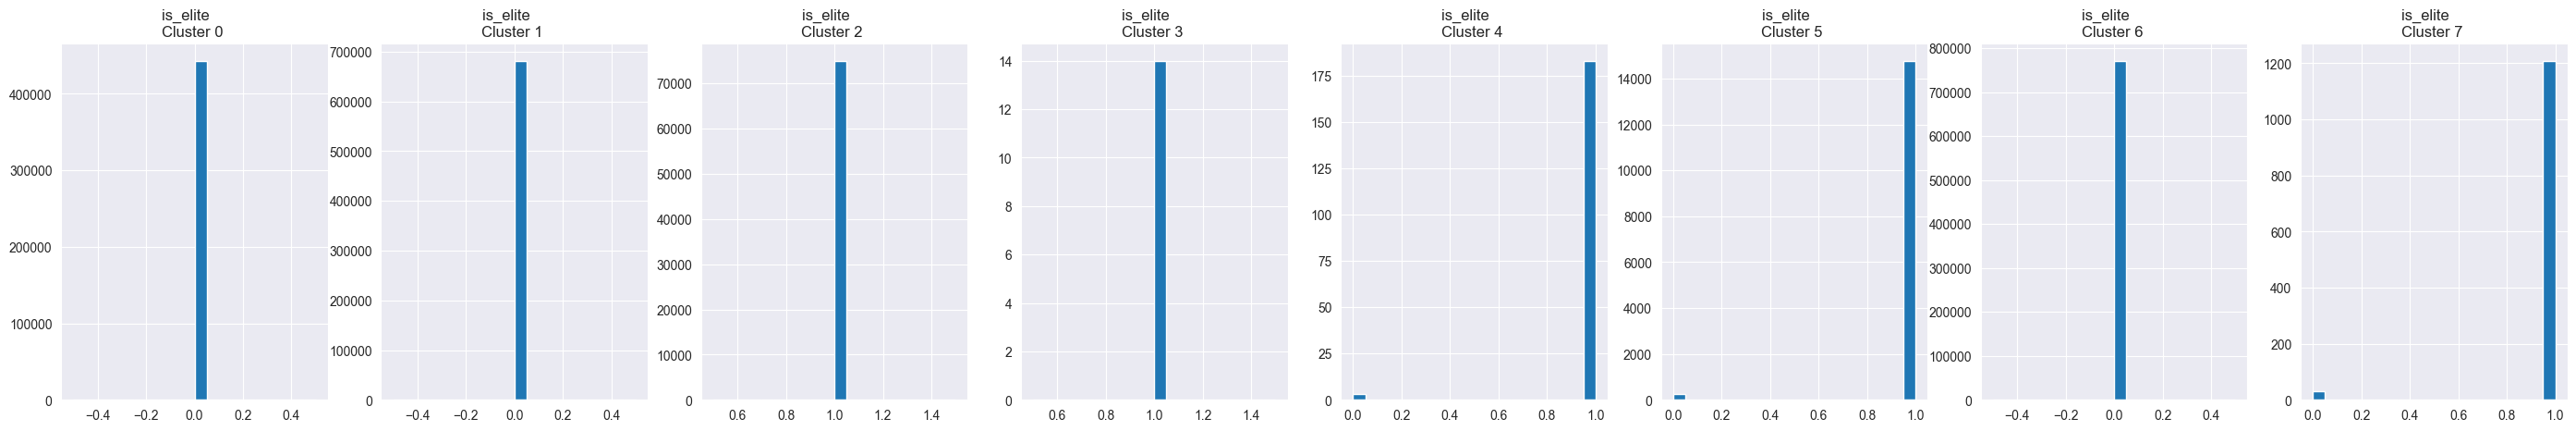

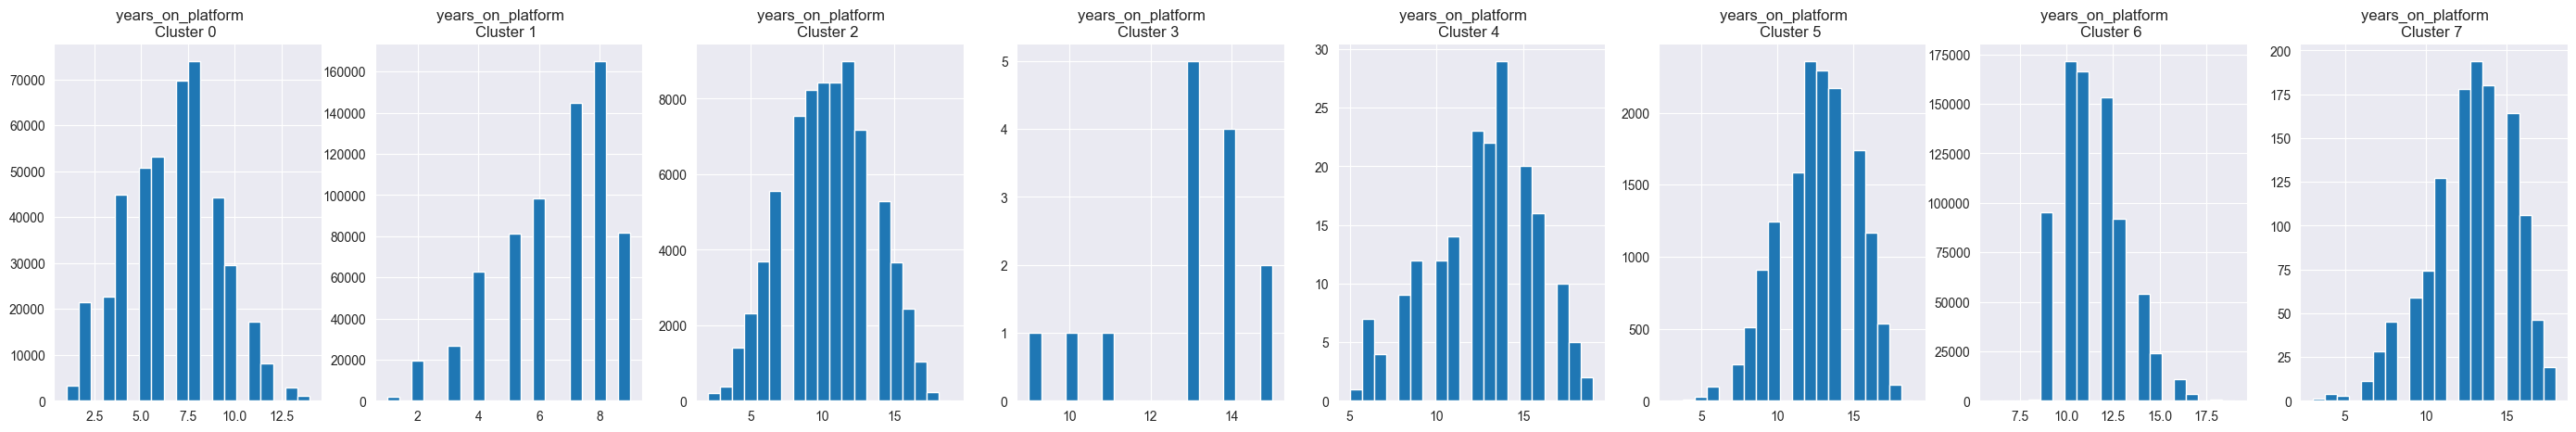

In [21]:
for i in user_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = user_df_cluster[user_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

In [22]:
pca = PCA(n_components=3)
principal_comp = pca.fit_transform(user_df_scaled)
principal_comp

array([[ 2.03471129e+01,  2.98563137e+00,  9.64382307e-01],
       [ 1.52955189e+02,  3.07638663e+01, -2.20590892e+00],
       [ 9.83905542e+00, -5.02207235e+00, -6.10071850e-01],
       ...,
       [-3.96905195e-01,  5.78335490e-01, -1.49297551e+00],
       [-2.23269593e-01,  5.18838763e-02,  2.80351862e-01],
       [-4.56444608e-01,  5.88724130e-01, -2.65917972e-01]])

In [23]:
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2','pca3'])
pca_df.head()

,pca1,pca2,pca3
0,20.347113,2.985631,0.964382
1,152.955189,30.763866,-2.205909
2,9.839055,-5.022072,-0.610072
3,4.517170,-4.616553,0.918521
4,0.313403,-0.505292,1.351502


In [24]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,pca3,cluster
0,20.347113,2.985631,0.964382,7
1,152.955189,30.763866,-2.205909,4
2,9.839055,-5.022072,-0.610072,5
3,4.517170,-4.616553,0.918521,2
4,0.313403,-0.505292,1.351502,6


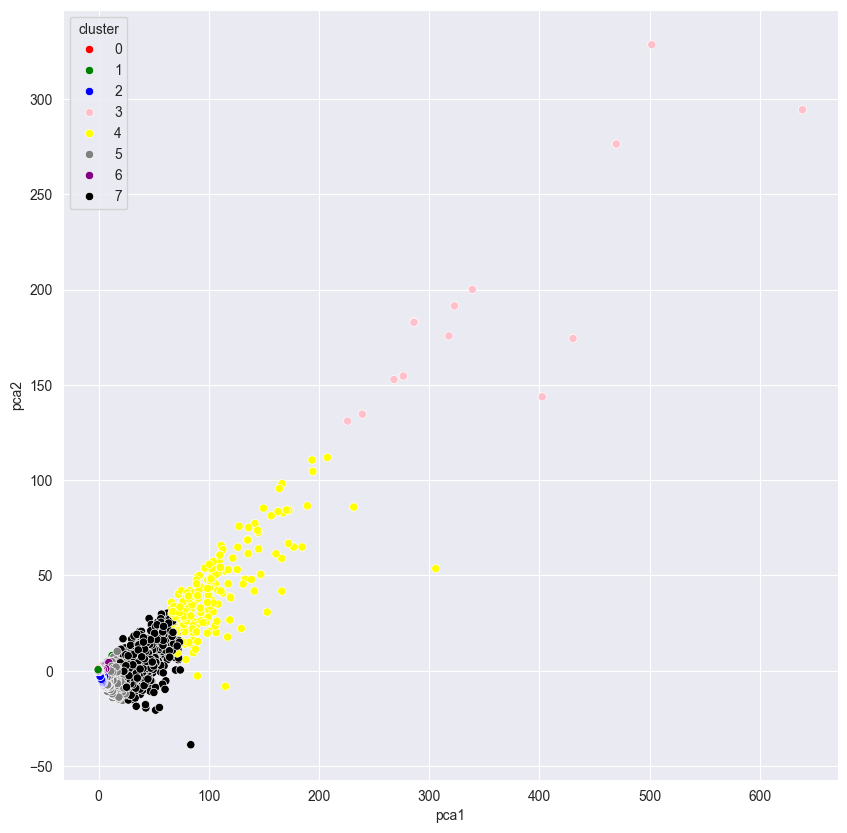

In [25]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

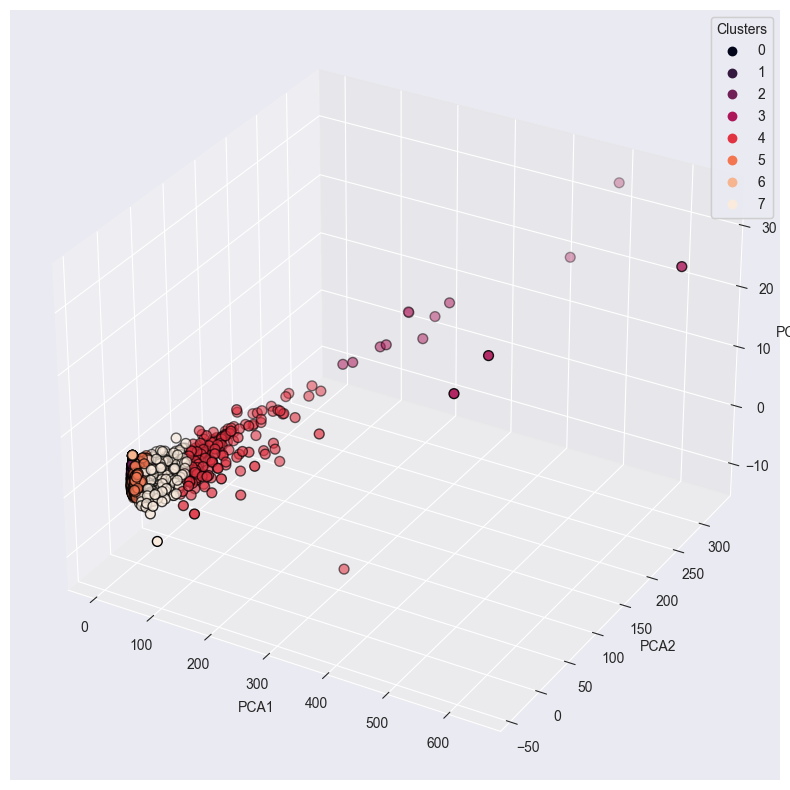

In [26]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')  # Creating a 3D subplot


scatter = ax.scatter(xs=pca_df['pca1'], ys=pca_df['pca2'], zs=pca_df['pca3'], c=pca_df['cluster'],
                     edgecolor='k', s=50)  # Removed cmap


ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')


legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()


In [27]:
encoding_dim = 7

input_df = Input(shape=(9,))




x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(9, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')

In [28]:
user_df_scaled.shape

(1987897, 9)

In [29]:
autoencoder.fit(user_df_scaled, user_df_scaled, batch_size = 2048, epochs = 5,  verbose = 1)

Epoch 1/5
971/971 [==============================] - 87s 89ms/step - loss: 0.1728
Epoch 2/5
971/971 [==============================] - 91s 94ms/step - loss: 0.1534
Epoch 3/5
971/971 [==============================] - 103s 106ms/step - loss: 0.1299
Epoch 4/5
971/971 [==============================] - 104s 107ms/step - loss: 0.1296
Epoch 5/5
971/971 [==============================] - 105s 108ms/step - loss: 0.1214


In [30]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 9)]               0         
                                                                 
 dense (Dense)               (None, 7)                 70        
                                                                 
 dense_1 (Dense)             (None, 500)               4000      
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 2000)              1002000   
                                                                 
 dense_4 (Dense)             (None, 10)                20010     
                                                                 
 dense_5 (Dense)             (None, 2000)              22000 

In [31]:
autoencoder.save_weights('autoencoder.h5')

In [32]:
pred = encoder.predict(user_df_scaled)

62122/62122 [==============================] - 48s 779us/step


In [33]:
pred.shape

(1987897, 10)

/Users/tharanidissanayake/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tharanidissanayake/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tharanidissanayake/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tharanidissanayake/PycharmProj

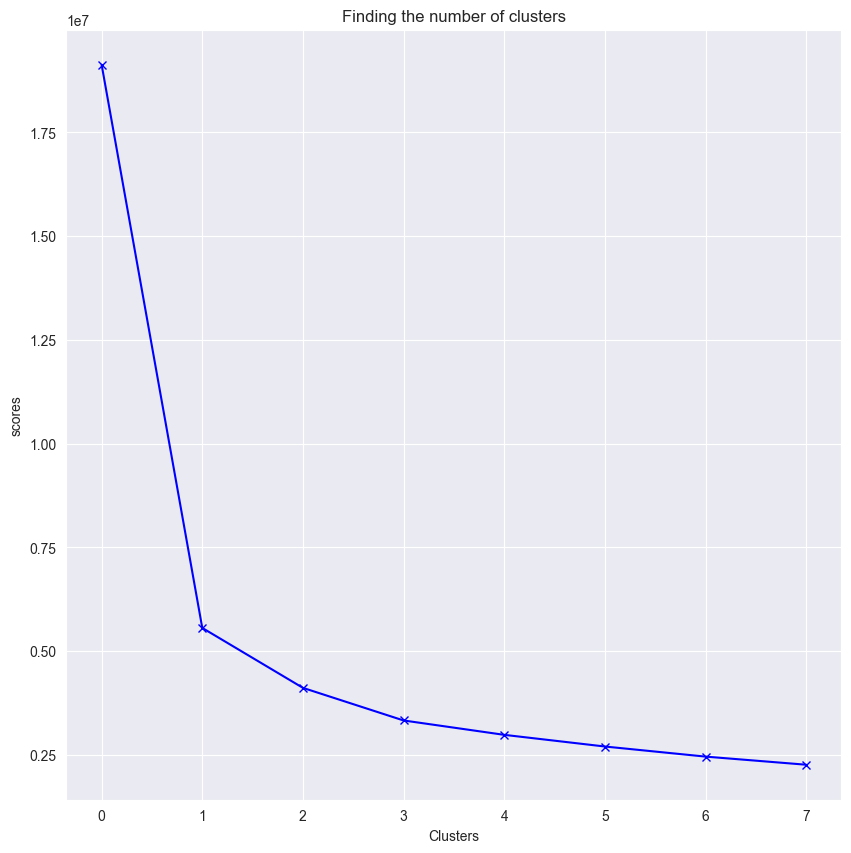

In [34]:
scores_2 = []

range_values = range(1, 9)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)
plt.figure(figsize=(10,10))
plt.plot(scores_2, 'bx-')
plt.title('Finding the number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

/var/folders/yt/nq7k6wkd3ngflpxh9khhztjc0000gn/T/ipykernel_4189/2593097746.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores_1, 'bx-', color = 'r')
/var/folders/yt/nq7k6wkd3ngflpxh9khhztjc0000gn/T/ipykernel_4189/2593097746.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores_2, 'bx-', color = 'g')


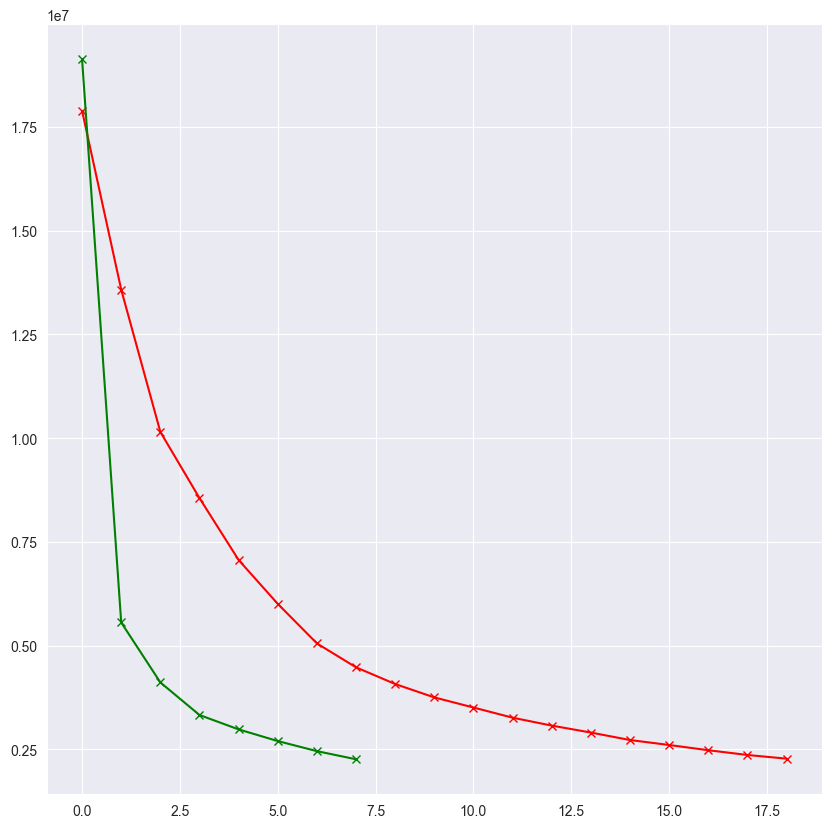

In [35]:
plt.figure(figsize=(10,10))
plt.plot(scores_1, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g')
plt.show()

In [36]:
kmeans = KMeans(3)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(user_df_scaled)

/Users/tharanidissanayake/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tharanidissanayake/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [37]:
df_cluster_dr = pd.concat([user_df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

,review_count,useful,funny,cool,fans,average_stars,elite_years,is_elite,years_on_platform,cluster
0,585,7217,1259,5994,267,3.91,1,1,16,2
1,4333,43091,13066,27281,3138,3.74,14,1,14,1
2,665,2086,1010,1003,52,3.32,5,1,15,0
3,224,512,330,299,28,4.27,3,1,18,1
4,79,29,15,7,1,3.54,0,0,16,0


In [38]:
cluster_counts = df_cluster_dr.groupby('cluster').size().reset_index(name='count')


print(cluster_counts)

   cluster    count
0        0  1133606
1        1    86880
2        2   767411


In [39]:
df_cluster_dr.to_csv('user_df_cluster.csv')

In [40]:
pca = PCA(n_components=3)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2','pca3'])
pca_df.head()

,pca1,pca2,pca3
0,-3.441978,1.211234,14.744603
1,41.630104,3.653594,28.593908
2,5.847084,-0.199097,-0.276050
3,8.706571,0.024421,1.084280
4,0.461315,-2.144694,-0.959425


In [41]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,pca3,cluster
0,-3.441978,1.211234,14.744603,2
1,41.630104,3.653594,28.593908,1
2,5.847084,-0.199097,-0.276050,0
3,8.706571,0.024421,1.084280,1
4,0.461315,-2.144694,-0.959425,0


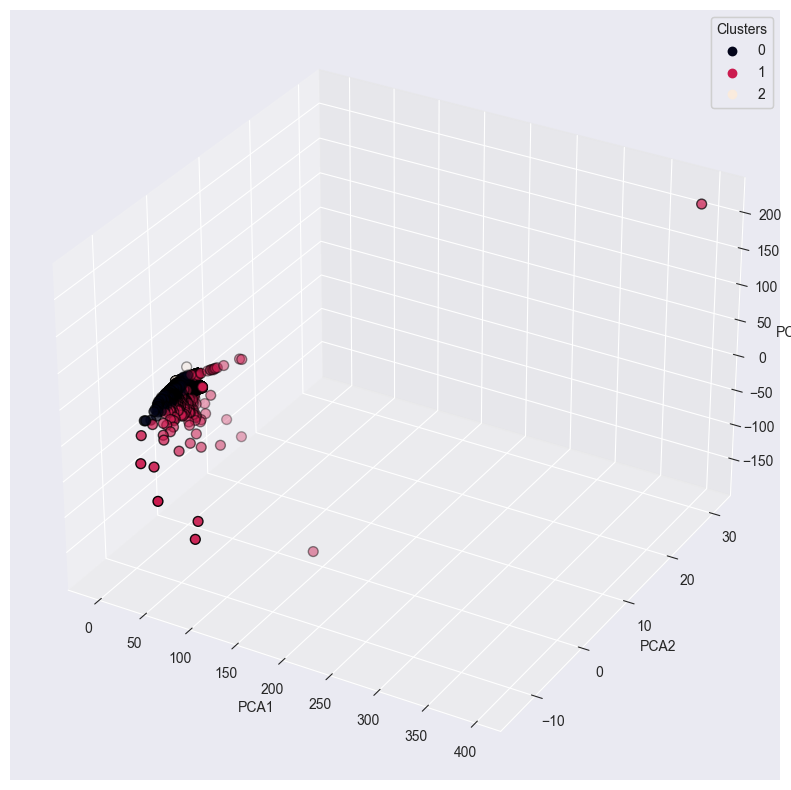

In [42]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')  # Creating a 3D subplot

# Scatter plot in 3D
scatter = ax.scatter(xs=pca_df['pca1'], ys=pca_df['pca2'], zs=pca_df['pca3'], c=pca_df['cluster'],
                     edgecolor='k', s=50)  # Removed cmap

# Adding labels
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

# Adding a legend
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()

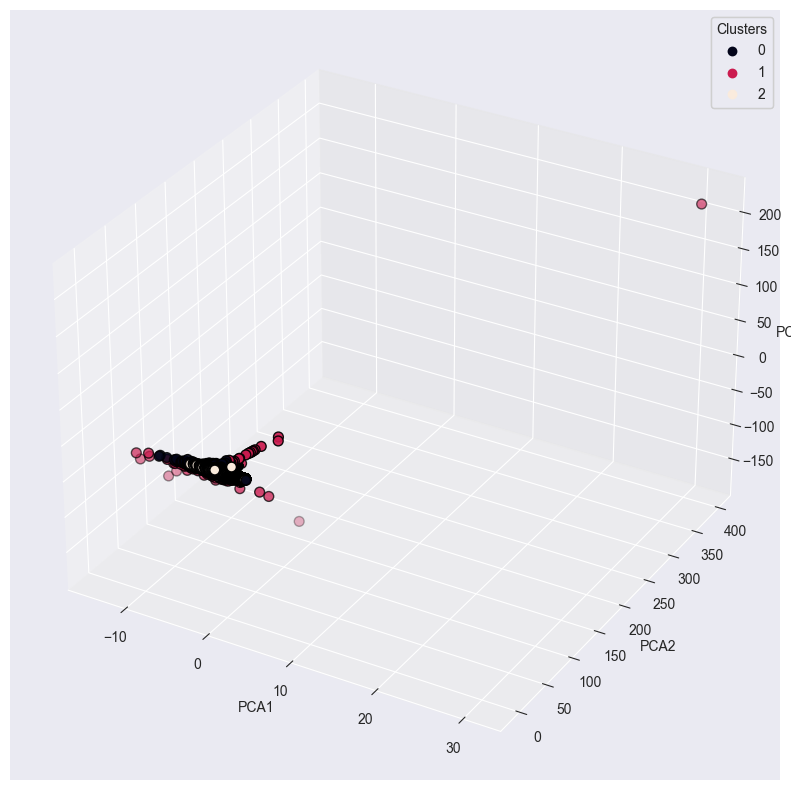

In [43]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')  # Creating a 3D subplot


scatter = ax.scatter(xs=pca_df['pca2'], ys=pca_df['pca1'], zs=pca_df['pca3'], c=pca_df['cluster'],
                     edgecolor='k', s=50)  


ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')


legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()

/var/folders/yt/nq7k6wkd3ngflpxh9khhztjc0000gn/T/ipykernel_4189/1664679183.py:2: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  ax = sns.scatterplot(x="pca3", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow'])


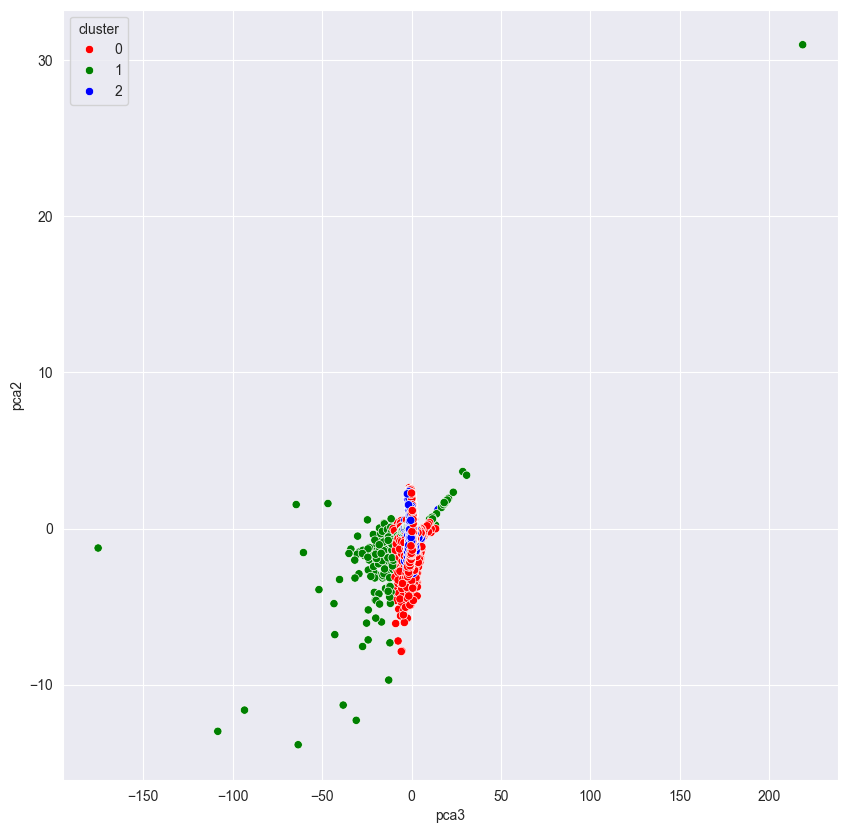

In [44]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca3", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow'])
plt.show()

/var/folders/yt/nq7k6wkd3ngflpxh9khhztjc0000gn/T/ipykernel_4189/1549387207.py:2: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  ax = sns.scatterplot(x="pca3", y="pca1", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow'])


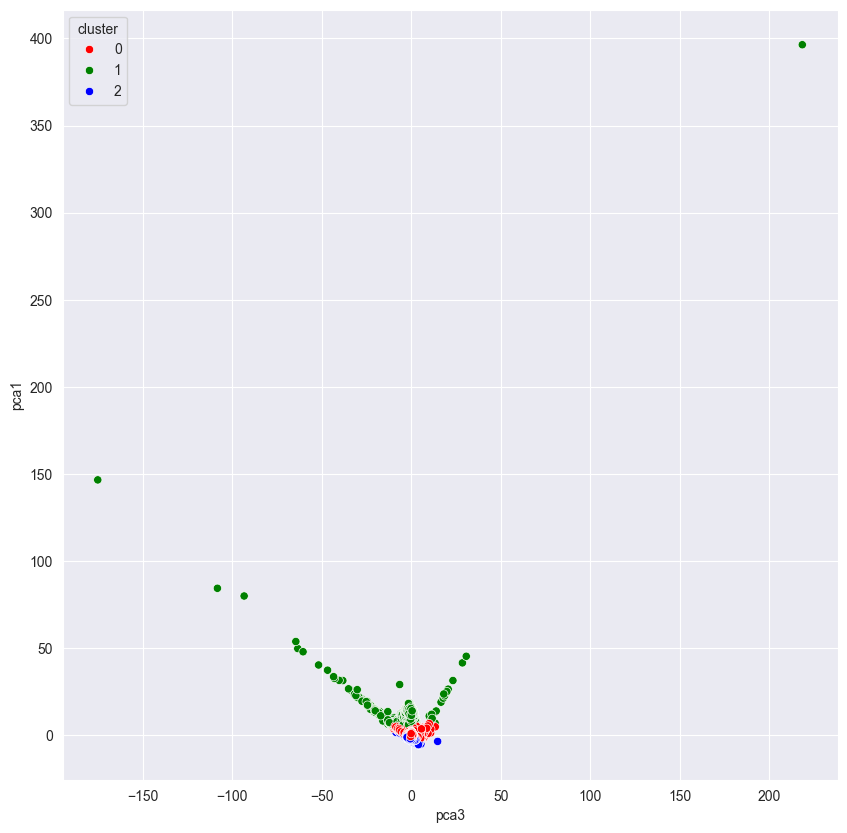

In [45]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca3", y="pca1", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow'])
plt.show()

/var/folders/yt/nq7k6wkd3ngflpxh9khhztjc0000gn/T/ipykernel_4189/355691717.py:2: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow'])


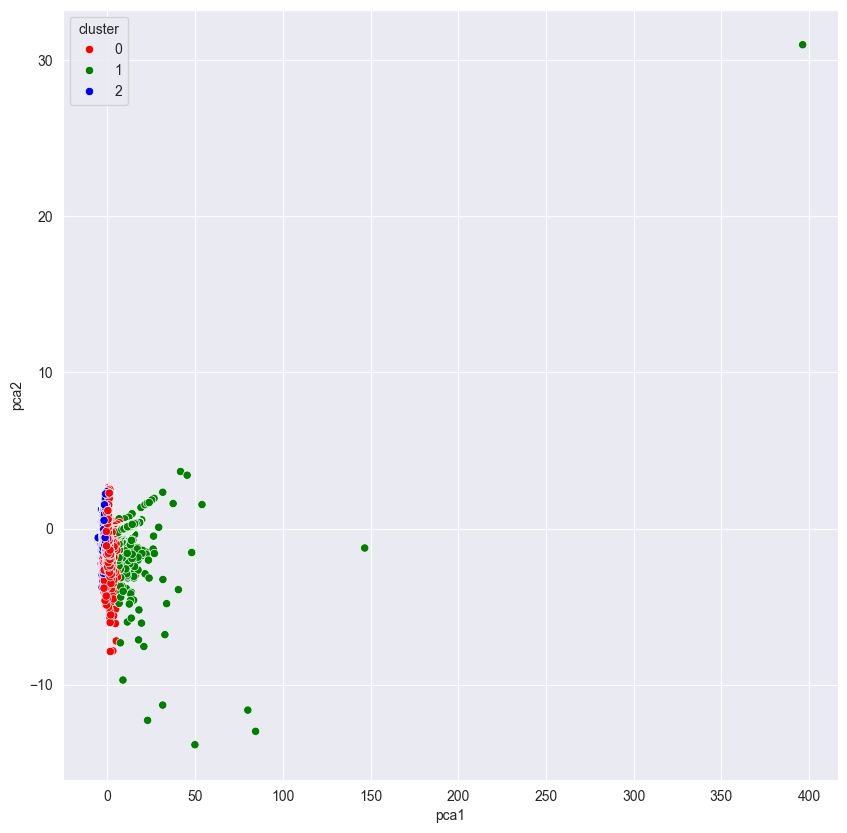

In [46]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow'])
plt.show()